<a href="https://colab.research.google.com/github/arvindhvasu/GL_Pneumonia_Detection/blob/master/09-june-2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stage 1 : Pre-Processing,Data Visualization,EDA**

1. Pre-Processing, Data Visualization, EDA
2. Dealing with missing values
3. Exploring the given Data files, classes and images of different classes.
4. Visualization of different classes
5. Analysis from the visualization of different classes.


## **Mount the Dataset from the drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import all the necessary libraries for pre-processing 

*   **Pandas** - for data structures & data analysis
*   **Numpy** - for computing with array objects
*   **Scikitlearn**- for pre-preprocessing & prediction
*   **Matplotlib** - for plotting tool library
*   **Seaborn** - for data visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
%matplotlib inline
import seaborn as sns
sns.set_style('dark')
from seaborn import countplot
from matplotlib.pyplot import figure, show
import os
!pip install pydicom
import pydicom as dcm
import matplotlib
from matplotlib.patches import Rectangle
import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.2.0'

# **Extracting & Loading the pneumonia dataset**

In [0]:
# importing required modules 
from zipfile import ZipFile

In [0]:
# specifying the zip file name 
capstone_project = "/content/drive/My Drive/Capstone/rsna-pneumonia-detection-challenge.zip"

In [0]:
# opening the zip file in READ mode 
with ZipFile(capstone_project, 'r') as zip: 
    # extracting all the files 
    zip.extractall()
   

In [0]:
#Set your project path 
capstone_project =  '/content'

In [0]:
import os

In [9]:
arr = os.listdir('/content')
print(arr)

['.config', 'GCP Credits Request Link - RSNA.txt', 'stage_2_test_images', 'stage_2_train_labels.csv', 'drive', 'stage_2_train_images', 'stage_2_sample_submission.csv', 'stage_2_detailed_class_info.csv', 'sample_data']


In [10]:
pd.read_csv('/content/stage_2_detailed_class_info.csv')

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,Lung Opacity
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,Normal
30224,c1f6b555-2eb1-4231-98f6-50a963976431,Normal
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity


## **Reading through the different classes of pneumonia to understand the Target Variable**

*   **No Lung Opacity/ Not Normal:** No Pneumonia but some abnormality observed
*   **Normal:** No Pneumonia observed
*   **Lung Opacity:** Pneumonia observed 

## **Reading through the Class Dataset**

In [0]:
df_class_info=pd.read_csv('/content/stage_2_detailed_class_info.csv')

In [12]:
df_class_info.shape

(30227, 2)

In [13]:
df_class_info.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [14]:
df_class_info.describe(include='all')

,patientId,class
count,30227,30227
unique,26684,3
top,0d5bc737-03de-4bb8-98a1-45b7180c3e0f,No Lung Opacity / Not Normal
freq,4,11821


In [15]:
df_class_info['patientId'].value_counts()

0d5bc737-03de-4bb8-98a1-45b7180c3e0f    4
3239951b-6211-4290-b237-3d9ad17176db    4
ee820aa5-4804-4984-97b3-f0a71d69702f    4
7d674c82-5501-4730-92c5-d241fd6911e7    4
32408669-c137-4e8d-bd62-fe8345b40e73    4
                                       ..
69571ac9-2ac8-4256-9584-cdc1848870bc    1
4f8d32f1-afd9-4679-98cf-a59820bd4848    1
eb2828dd-cd30-4a47-a8b6-3b0924ef8ffa    1
b79c08ae-0951-4632-94ef-5e1153cfb489    1
e44ab157-4b17-4afe-9ca0-65ddfd15ae0c    1
Name: patientId, Length: 26684, dtype: int64

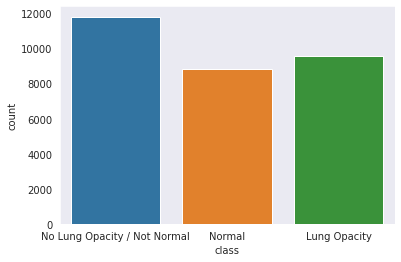

In [16]:
figure()
countplot(data=df_class_info,x="class")
show()

Patient ID abov gives the unique identies to different classes of pneumonia in the present data set - **No Lung Opacity / Not Normal,Lung Opacity,Normal**


## **Reading through the Train Labels Dataset**

In [0]:
df_train_labels=pd.read_csv('/content/stage_2_train_labels.csv')

In [18]:
df_train_labels.shape


(30227, 6)

In [19]:
df_train_labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


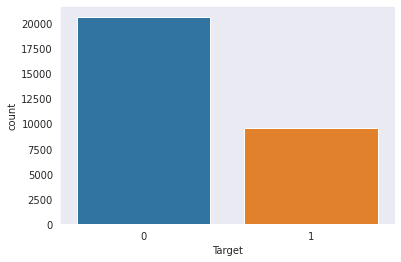

In [20]:
figure()
countplot(data=df_train_labels,x="Target")
show()

Dataset has impressions of NaN present in few columns as Missing values which would need to be handled for model building & tuning 
understanding from the data set is as below:
Target 0 : No Pneumonia
Target 1 : Pneumonia 
All rows with columns X to width (L-R) have NaN which means patients with NaN, they dont have pneumonia while the ones with the value 1 or more than 1 are the areas of pneumonia detected. 

## **2. Dealing with missing values**
No Missing values in the dataset present which require changes the "NAN" present are a part of the data set

In [21]:
df_train_labels.isnull().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

In [22]:
df_class_info.isnull().sum()

patientId    0
class        0
dtype: int64

**To count the instances of each class in the data to check if data is skewed towards a class**

In [23]:
df_train_labels.groupby(["Target"]).count() 

,patientId,x,y,width,height
Target,,,,,
0,20672,0,0,0,0
1,9555,9555,9555,9555,9555


**Target 0 : No Pneumonia Target 1 : Pneumonia/abnormal syptoms**


In [24]:
df_train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


**Descriptive statistics of each of the attributes**

In [25]:
df_train_labels.describe(include='all')

,patientId,x,y,width,height,Target
count,30227,9555.000000,9555.000000,9555.000000,9555.000000,30227.000000
unique,26684,NaN,NaN,NaN,NaN,NaN
top,0d5bc737-03de-4bb8-98a1-45b7180c3e0f,NaN,NaN,NaN,NaN,NaN
freq,4,NaN,NaN,NaN,NaN,NaN
mean,NaN,394.047724,366.839560,218.471376,329.269702,0.316108
std,NaN,204.574172,148.940488,59.289475,157.750755,0.464963
min,NaN,2.000000,2.000000,40.000000,45.000000,0.000000
25%,NaN,207.000000,249.000000,177.000000,203.000000,0.000000
50%,NaN,324.000000,365.000000,217.000000,298.000000,0.000000
75%,NaN,594.000000,478.500000,259.000000,438.000000,1.000000


In [26]:
df_train_labels.columns

Index(['patientId', 'x', 'y', 'width', 'height', 'Target'], dtype='object')

In [27]:
df_train_labels.columns

Index(['patientId', 'x', 'y', 'width', 'height', 'Target'], dtype='object')

In [28]:
df_train_labels.groupby("Target").count()

,patientId,x,y,width,height
Target,,,,,
0,20672,0,0,0,0
1,9555,9555,9555,9555,9555


In [29]:
df_train_labels[df_train_labels['Target'] == 1]

,patientId,x,y,width,height,Target
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1
14,00aecb01-a116-45a2-956c-08d2fa55433f,288.0,322.0,94.0,135.0,1
...,...,...,...,...,...,...
30220,c1e73a4e-7afe-4ec5-8af6-ce8315d7a2f2,316.0,504.0,179.0,273.0,1
30221,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,609.0,464.0,240.0,284.0,1
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,185.0,298.0,228.0,379.0,1
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,570.0,393.0,261.0,345.0,1


**Pneumonia Identified with Target value as 1**

**To understand the classes division in terms of number**


In [30]:
df_class_info['class'].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

In [31]:
round((df_class_info['class'].value_counts()/len(df_class_info.index) * 100),2)

No Lung Opacity / Not Normal    39.11
Lung Opacity                    31.61
Normal                          29.28
Name: class, dtype: float64

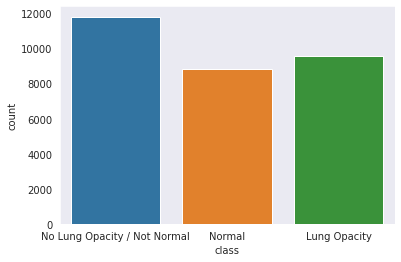

In [32]:
sns.countplot(df_class_info['class'])

“**Merging” two datasets is the process of bringing two datasets together into one & aligning the rows from each based on common attributes or columns,The words “merge” & “join” are used relatively interchangeably in Pandas & other language**s

**Merging two datasets "df_class_info,df_train_labels"**

In [33]:
df_class_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  30227 non-null  object
 1   class      30227 non-null  object
dtypes: object(2)
memory usage: 472.4+ KB


In [34]:
df_class_info.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [35]:
df_train_labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [36]:
df_train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


In [0]:
train_class_df=df_train_labels.merge(df_class_info, left_on='patientId', right_on='patientId', how='inner')

In [38]:
df_Train_Class_labels = df_train_labels.merge(df_class_info, left_on='patientId', right_on='patientId', how='inner')
df_class_info.shape

(30227, 2)

In [39]:
df_Train_Class_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37629 entries, 0 to 37628
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  37629 non-null  object 
 1   x          16957 non-null  float64
 2   y          16957 non-null  float64
 3   width      16957 non-null  float64
 4   height     16957 non-null  float64
 5   Target     37629 non-null  int64  
 6   class      37629 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 2.3+ MB


In [0]:
df_Train_Class_labels = df_Train_Class_labels.drop_duplicates()

In [41]:
df_Train_Class_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 37627
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ MB


In [42]:
df_Train_Class_labels.head(5)

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


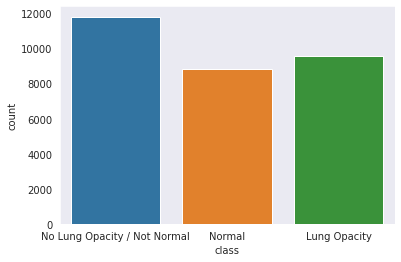

In [43]:
figure()
countplot(data=df_Train_Class_labels,x="class")
show()

**OS module in python provides functions for interacting with the operating system,OS.listdir() method in python is used to get the list of all files and directories in the specified directory**

In [44]:
image_train_loc = os.listdir('/content/stage_2_train_images')
image_test_loc = os.listdir('/content/stage_2_test_images')
print("Number of images in train set:", len(image_train_loc),"\nNumber of images in test set:", len(image_test_loc))

Number of images in train set: 26684 
Number of images in test set: 3000


In [45]:
print("Unique Patient Id from df_Train_Class_labels: ", df_Train_Class_labels['patientId'].nunique())

Unique Patient Id from df_Train_Class_labels:  26684


In [46]:
TestPatientID = df_Train_Class_labels["patientId"][0]
TestPatientID = TestPatientID+'.dcm'
dicom_file_loc = os.path.join("/content/stage_2_train_images",TestPatientID)
dicom_file_dataset = dcm.read_file(dicom_file_loc)
dicom_file_dataset

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

In order to work with the Medical images that are stored in a special format called DICOM files - (*Dcm),we would need to install the package "pydicom"to create an understanding of the image type & gives the opportunity to further explore it

In [47]:
pip install pydicom

In [48]:
import pydicom, glob, pylab
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

patientId = df_class_info['patientId'][1] #No lung opacity/ Not normal
dcm_train = '/content/stage_2_train_images/%s.dcm' % patientId
dcm_med = pydicom.read_file(dcm_train)
print(dcm_med)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.26024.1517874469.23011
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.26024.1517874469.23011
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time        

In [49]:
pip install common

In [0]:
#!python3 "/content/common.py"
import common as com


In [0]:
def display_images(data):
	    img_data = list(data.T.to_dict().values())
	    #img_data = list(data)
	    f, ax = plt.subplots(1,3, figsize=(16,18))
	    for i,data_row in enumerate(img_data):
              imageName = data_row['patientId']+'.dcm'
              imagePath = os.path.join('/content/stage_2_train_images',imageName)
              data_row_img = dcm.dcmread(imagePath)
              ax[i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
              ax[i%3].axis('off')
              ax[i%3].set_title('ID: {}\nClass: {}'.format(
                  data_row['patientId'], data_row['class']))
	    plt.show()
	    
def display_images_with_boxes(data):
	    img_data = list(data.T.to_dict().values())
	    f, ax = plt.subplots(1,3, figsize=(16,18))
	    for i,data_row in enumerate(img_data):
              imageName = data_row['patientId']+'.dcm'
              imagePath = os.path.join('/content/stage_2_train_images',imageName)
              data_row_img = dcm.dcmread(imagePath)
              ax[i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
              ax[i%3].axis('off')
              ax[i%3].set_title('ID: {}\nClass: {}'.format(
                  data_row['patientId'], data_row['class']))
              rows = df_Train_Class_labels[df_Train_Class_labels['patientId']==data_row['patientId']]
              box_data = list(rows.T.to_dict().values())
              for j, row in enumerate(box_data):
                  ax[i%3].add_patch(Rectangle(xy=(row['x'], row['y']),
                      width=row['width'],height=row['height'], 
                      linewidth=1,edgecolor='r',facecolor='none'))   
	    plt.show()
   
def collect_metadata(data, location):
	    dcm_columns = None

	    for n, pid in enumerate(data['patientId'].unique()):
              imageName = pid+'.dcm'
              imagePath = os.path.join('/content/stage_2_train_images' + location, imageName)
              dcm_data = dcm.read_file(imagePath)
              """ 
              if not dcm_columns:
                  dcm_columns = dcm_data.dir()

              for col in dcm_columns:
                  if col in ["PatientAge", "PatientSex", "ViewPosition"]:
                        value = dcm_data.data_element(col).value
                        index = data[data['patientId'] == pid].index
                        data.loc[index, col] = value
                """ 
              index = data[data['patientId'] == pid].index
              data.loc[index, "PatientAge"] = dcm_data.data_element("PatientAge").value
              data.loc[index, "PatientSex"] = dcm_data.data_element("PatientSex").value
              data.loc[index, "ViewPosition"] = dcm_data.data_element("ViewPosition").value
              del dcm_data

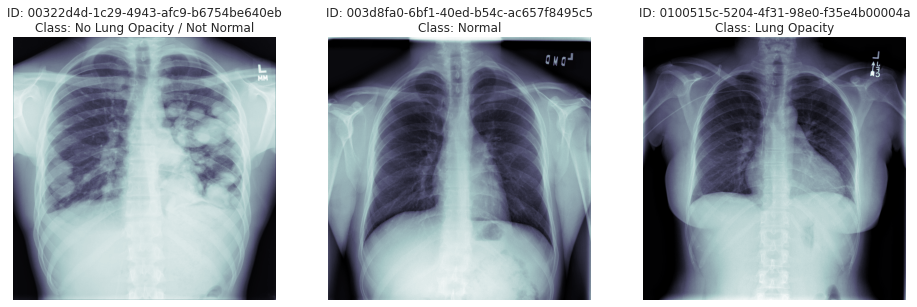

In [52]:
uni_patient_id = ['00322d4d-1c29-4943-afc9-b6754be640eb','003d8fa0-6bf1-40ed-b54c-ac657f8495c5','0100515c-5204-4f31-98e0-f35e4b00004a']
test_df = df_Train_Class_labels[df_Train_Class_labels.patientId.isin(uni_patient_id)]
display_images(test_df)

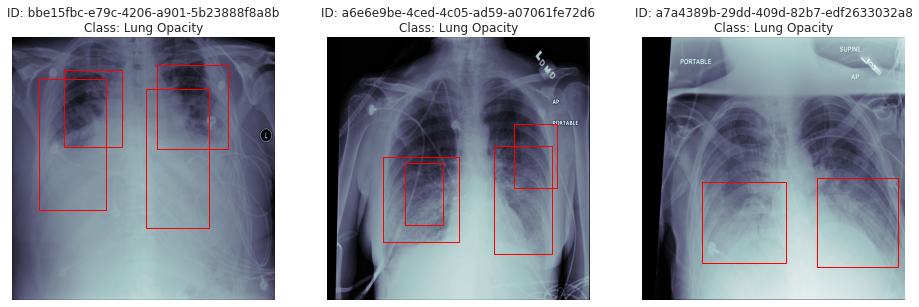

In [53]:
Test_tar_df = df_Train_Class_labels[df_Train_Class_labels['Target']==1].sample(5)
display_images_with_boxes(Test_tar_df)

In [66]:
collect_metadata(df_Train_Class_labels, "capstone_project")
df_Train_Class_labels.head(5)

FileNotFoundError: ignored

In [59]:
df_Train_Class_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 37627
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 3.1+ MB


In [0]:
import pickle
file_Name = "df_Train_Class_pickle"
# open the file for writing
fileObject = open(file_Name,'wb') 

# this writes the object df_Train_Class_labels to the
# file named 'df_Train_Class_pickle'
pickle.dump(df_Train_Class_labels, fileObject)   

# here we close the fileObject
fileObject.close()

In [73]:
file_Name = "/df_Train_Class_pickle"
# we open the file for reading
fileObject = open(capstone_project+file_Name,'rb')  
# load the object from the file into temp var b
df_Train_Class_pic = pickle.load(fileObject)  
df_Train_Class_pic.head(5)

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


In [86]:
countplot(data = df_Train_Class_pic, x = 'PatientSex', hue = 'Target');

ValueError: ignored

In [71]:
figure(figsize = (20, 5))
countplot(data = df_Train_Class_pic, x = 'PatientAge', hue = 'Target');

ValueError: ignored

<Figure size 1440x360 with 0 Axes>

In [75]:
countplot(data = df_Train_Class_pic, x = 'ViewPosition', hue = 'Target');

ValueError: ignored

0    20672
1     9555
Name: Target, dtype: int64

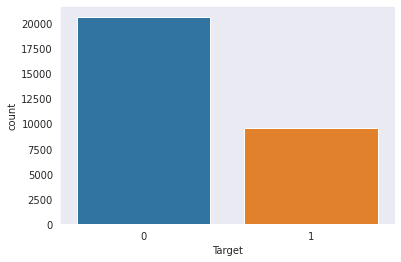

In [76]:
countplot(data=df_Train_Class_pic,x="Target")
df_Train_Class_pic["Target"].value_counts()

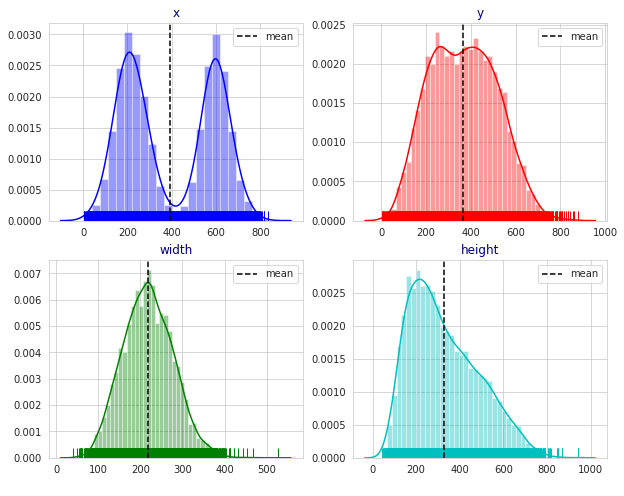

In [87]:
#Distribution of Bounding Boxes
#We use only the rows which have bounding boxes
data_bb = df_Train_Class_pic[df_Train_Class_pic['Target'] == 1]
data_bb = data_bb[['x','y','width','height']]
sns.set_style('whitegrid')

cols = [i for i in data_bb.columns]
length = len(cols)
fig = plt.figure(figsize = (10,8))

import itertools
cs = ["b","r","g","c"]
for i,j,k in itertools.zip_longest(cols, range(length), cs):
  plt.subplot(2,2, j+1)
  ax = sns.distplot(data_bb[i], color = k, rug = True)
  ax.set_facecolor("w")
  plt.axvline(data_bb[i].mean(), linestyle = 'dashed', label = 'mean', color = 'k')
  plt.legend(loc = 'best')
  plt.title(i, color = 'navy')
  plt.xlabel(" ")

In [0]:
#Create a new column 'area' to capture of area of bounding boxes
df_Train_Class_pic['area'] = df_Train_Class_pic['height'] * df_Train_Class_pic['width']

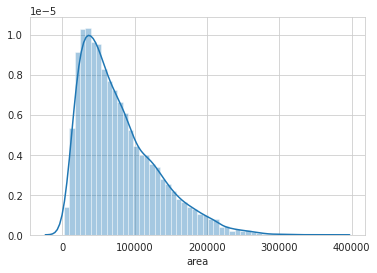

In [89]:
#Distribution of infected areas
sns.distplot(df_Train_Class_pic['area'])

In [91]:
#as patient_age column has dtype of 'object' therefore converting to 'int64'
df_Train_Class_pic['patient_age'] = df_Train_Class_pic['patient_age'].astype('int64')
df_Train_Class_pic.describe(include = 'all')

KeyError: ignored

In [92]:
#Using modulo
df_Train_Class_pic['patient_age'] = df_Train_Class_pic['patient_age'].apply(lambda x: x % 100 if x > 100 else x)

KeyError: ignored

In [93]:
#Distribution of patient_age
plt.figure(figsize = (10,5))
sns.boxplot(data_final['patient_age'])

NameError: ignored

<Figure size 720x360 with 0 Axes>

In [77]:
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(df_Train_Class_pic, test_size=0.25,
                                    stratify=df_Train_Class_pic['Target'])
print(df_train.shape, 'training data')
print(df_val.shape, 'validation data')

(22670, 7) training data
(7557, 7) validation data


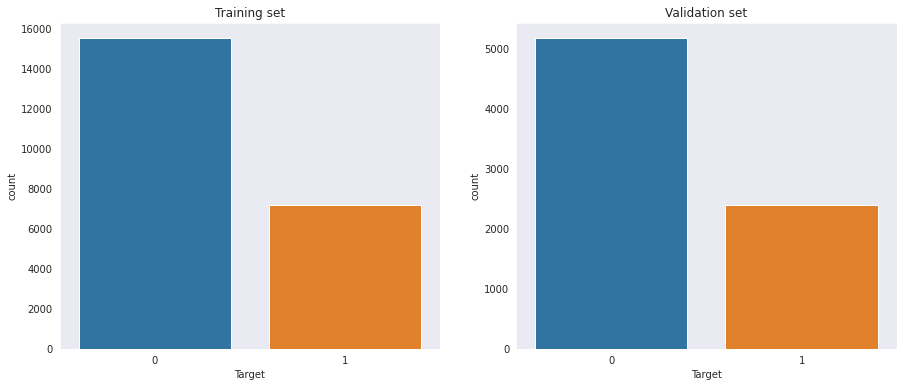

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))
ax1.set_title("Training set")
ax2.set_title("Validation set")
countplot(data=df_train,x="Target", ax= ax1)
countplot(data=df_val,x="Target", ax= ax2)
show()

In [80]:
print("The value count of Target column in train dataset...")
df_train["Target"].value_counts()


The value count of Target column in train dataset...


0    15504
1     7166
Name: Target, dtype: int64

In [81]:
print("The value count of Target column in validation dataset...")
df_val["Target"].value_counts()

The value count of Target column in validation dataset...


0    5168
1    2389
Name: Target, dtype: int64

In [0]:
df_train_pick = "df_T_pickle"
df_val_pick = "df_V_pickle"

# open the file for writing
fileObject = open(df_train_pick,'wb') 
fileObject1 = open(df_val_pick,'wb') 

pickle.dump(df_train, fileObject) 
pickle.dump(df_val, fileObject1)   

# here we close the fileObjects
fileObject.close()
fileObject1.close()

callbacks


In [0]:
filepath="transferlearning_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [0]:
import tensorflow as tf
tf.keras.backend.clear_session()
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , RMSprop
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras import backend as K

In [106]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [0]:
from sklearn.model_selection import GridSearchCV

In [109]:
def swish_activation(x):
    return (K.sigmoid(x) * x)

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(3,150,150)))
model.add(Conv2D(16, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(3,150,150)))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation=swish_activation))
model.add(Dropout(0.4))
model.add(Dense(2 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(lr=0.00005),
                  metrics=['accuracy'])

print(model.summary())


ValueError: ignored

In [0]:
batch_size = 256
epochs = 6

In [0]:
history = model.fit(X_train, y_train, validation_data = (X_test , y_test) ,callbacks=[lr_reduce,checkpoint] ,
          epochs=epochs)

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

In [0]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

precision = True Positive / (True Positive + False Positive)
recall = True Positive / (True Positive + False Negative)

## **UNET MODEL**

In [0]:
import csv
import math
import cv2

import numpy as np
import tensorflow as tf
from PIL import Image
from tensorflow.keras import Model
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Concatenate, Conv2D, UpSampling2D, Reshape
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

In [0]:
ALPHA = 1 # Width hyper parameter for MobileNet (0.25, 0.5, 0.75, 1.0). Higher width means more accurate but slower

IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

HEIGHT_CELLS = 28
WIDTH_CELLS = 28

CELL_WIDTH = IMAGE_WIDTH / WIDTH_CELLS
CELL_HEIGHT = IMAGE_HEIGHT / HEIGHT_CELLS

EPOCHS = 1
BATCH_SIZE = 4
PATIENCE = 10

THREADS = 1

PATH = "C:/Users/Amit/Documents/Great Learning/M6 Advanced CNNs/ObjectLocalization/example_1/"

TRAIN_CSV = PATH+"train.csv"
VALIDATION_CSV = PATH+"validation.csv"

In [0]:
class DataGenerator(Sequence):

    def __init__(self, csv_file):
        self.paths = []

        with open(csv_file, "r") as file:
            self.mask = np.zeros((sum(1 for line in file), HEIGHT_CELLS, WIDTH_CELLS))
            file.seek(0)

            reader = csv.reader(file, delimiter=",")

            for index, row in enumerate(reader):
                for i, r in enumerate(row[1:7]):
                    row[i+1] = int(r)

                path, image_height, image_width, x0, y0, x1, y1, _, _ = row

                path_mask = path.replace('.jpg','.png')

                mask_img = cv2.imread(path_mask)
                mask_img = (mask_img!=2)*1.0
                mask_img = cv2.resize(mask_img, (28, 28))
                mask_img = 1.0*(mask_img[:,:,0]>0.2)
                self.mask[index,:,:] = np.squeeze(mask_img)
                
                self.paths.append(path)

    def __len__(self):
        return math.ceil(len(self.mask) / BATCH_SIZE)

    def __getitem__(self, idx):
        batch_paths = self.paths[idx * BATCH_SIZE:(idx + 1) * BATCH_SIZE]
        batch_masks = self.mask[idx * BATCH_SIZE:(idx + 1) * BATCH_SIZE]

        batch_images = np.zeros((len(batch_paths), IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=np.float32)
        for i, f in enumerate(batch_paths):
            img = Image.open(f)
            img = img.resize((IMAGE_WIDTH, IMAGE_HEIGHT))
            img = img.convert('RGB')

            batch_images[i] = preprocess_input(np.array(img, dtype=np.float32))
            img.close()

        return batch_images, batch_masks

In [0]:
def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable

    block1 = model.get_layer("conv_pw_5_relu").output
    block2 = model.get_layer("conv_pw_11_relu").output
    block3 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block3), block2])
    x = Concatenate()([UpSampling2D()(x), block1])

    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((HEIGHT_CELLS, WIDTH_CELLS))(x)

    return Model(inputs=model.input, outputs=x)

In [0]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

In [0]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tf.log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

In [0]:
model = create_model(False)
model.summary()

train_datagen = DataGenerator(TRAIN_CSV)
validation_datagen = DataGenerator(VALIDATION_CSV)

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

checkpoint = ModelCheckpoint("model-{val_loss:.2f}.h5", monitor="val_loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="auto", period=1)
stop = EarlyStopping(monitor="val_loss", patience=PATIENCE, mode="auto")
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="auto")

In [0]:
model.fit_generator(generator=train_datagen,
                    epochs=EPOCHS,
                    validation_data=validation_datagen,
                    callbacks=[checkpoint, reduce_lr, stop],
                    workers=THREADS,
                    use_multiprocessing=False,
                    shuffle=True,
                    verbose=1)

In [0]:
import cv2
import numpy as np

from keras.applications.mobilenet import preprocess_input

In [0]:
WEIGHTS_FILE = "model-0.92.h5"
THRESHOLD = 0.8
EPSILON = 0.02

model = create_model()
model.load_weights(WEIGHTS_FILE)

In [0]:
filename = 'C:/Users/Amit/Documents/Great Learning/M6 Advanced CNNs/ObjectLocalization/images/NewCat2.jpg'

unscaled = cv2.imread(filename)
image = cv2.resize(unscaled, (IMAGE_WIDTH, IMAGE_HEIGHT))
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

region = model.predict(x=np.array([feat_scaled]))[0]

output = np.zeros(unscaled.shape[:2], dtype=np.uint8)
for i in range(region.shape[1]):
    for j in range(region.shape[0]):
        if region[i][j] > THRESHOLD:
            x = int(CELL_WIDTH * j * unscaled.shape[1] / IMAGE_WIDTH)
            y = int(CELL_HEIGHT * i * unscaled.shape[0] / IMAGE_HEIGHT)
            x2 = int(CELL_WIDTH * (j + 1) * unscaled.shape[1] / IMAGE_WIDTH)
            y2 = int(CELL_HEIGHT * (i + 1) * unscaled.shape[0] / IMAGE_HEIGHT)
            #cv2.rectangle(unscaled, (x, y), (x2, y2), (0, 255, 0), 1)

            output[y:y2,x:x2] = 1

_, contours, _ = cv2.findContours(output, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, EPSILON * cv2.arcLength(cnt, True), True)
    x, y, w, h = cv2.boundingRect(approx)
    cv2.rectangle(unscaled, (x, y), (x + w, y + h), (0, 255, 0), 1)

cv2.imshow("image", unscaled)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [0]:
filename = 'C:/Users/Amit/Documents/Great Learning/M6 Advanced CNNs/ObjectLocalization/images/NewCats3.jpg'

unscaled = cv2.imread(filename)
image = cv2.resize(unscaled, (IMAGE_WIDTH, IMAGE_HEIGHT))
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

pred_mask = cv2.resize(1.0*(model.predict(x=np.array([feat_scaled]))[0] > 0.5), (IMAGE_WIDTH,IMAGE_HEIGHT))

image2 = image
image2[:,:,0] = pred_mask*image[:,:,0]
image2[:,:,1] = pred_mask*image[:,:,1]
image2[:,:,2] = pred_mask*image[:,:,2]

out_image = image2

cv2.imshow("Predicted Mask", out_image)
cv2.waitKey(0)
cv2.destroyAllWindows()